<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Avalia%C3%A7%C3%A3o_Op%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vectorbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [2]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mplfinance as mpf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_19_01.xlsx",)
Opções.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,10.40,10.17,1.0,-0.0123,9.78,0.62,8.5,10.37,25.77,0.02,0.04,0.05,0.0,-0.0001,0.0,0.0,0.05
1,10.05,9.93,1.0,-0.0124,9.53,0.52,0.0,10.21,26.02,0.03,0.04,0.04,0.0,-0.0001,0.0,0.0,0.04
2,9.33,9.68,1.0,-0.0126,9.28,0.05,0.0,9.87,26.27,0.03,0.04,0.04,0.0,-0.0001,0.0,0.0,0.04
3,9.56,9.44,1.0,-0.0128,9.03,0.53,0.0,0.00,26.52,0.03,0.05,0.03,0.0,-0.0002,0.0,0.0,0.03
4,9.55,9.19,1.0,-0.0129,8.78,0.77,0.0,0.00,26.77,0.04,0.05,0.05,0.0,-0.0002,0.0,0.0,0.05


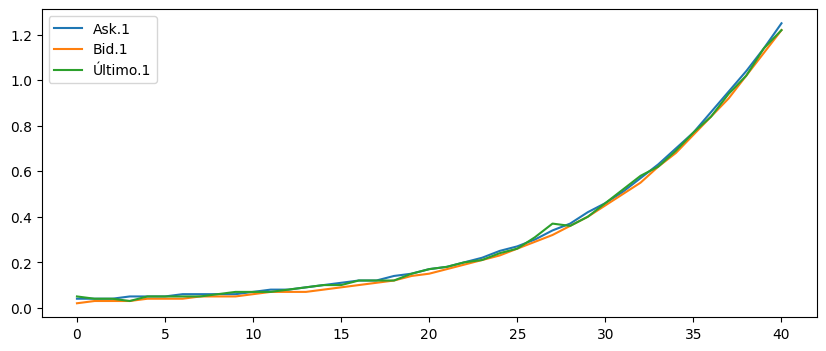

In [9]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0.5)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (10,4));

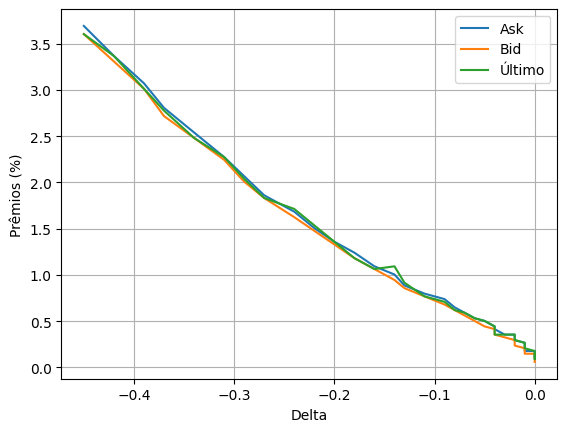

In [18]:
Ativo = 33.86
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Último.1']]*100/Ativo,label='Último')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()